<a href="https://colab.research.google.com/github/capofwesh20/Credit-card-fraud-detection/blob/main/Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1 Introduction

Imbalanced data refers to a situation, primarily in classification machine learning, where one target class represents a significant proportion of observations. Imbalanced datasets are those where there is a severe skew in the class distribution, such as 1:100 or 1:1000 examples in the minority class to the majority class.

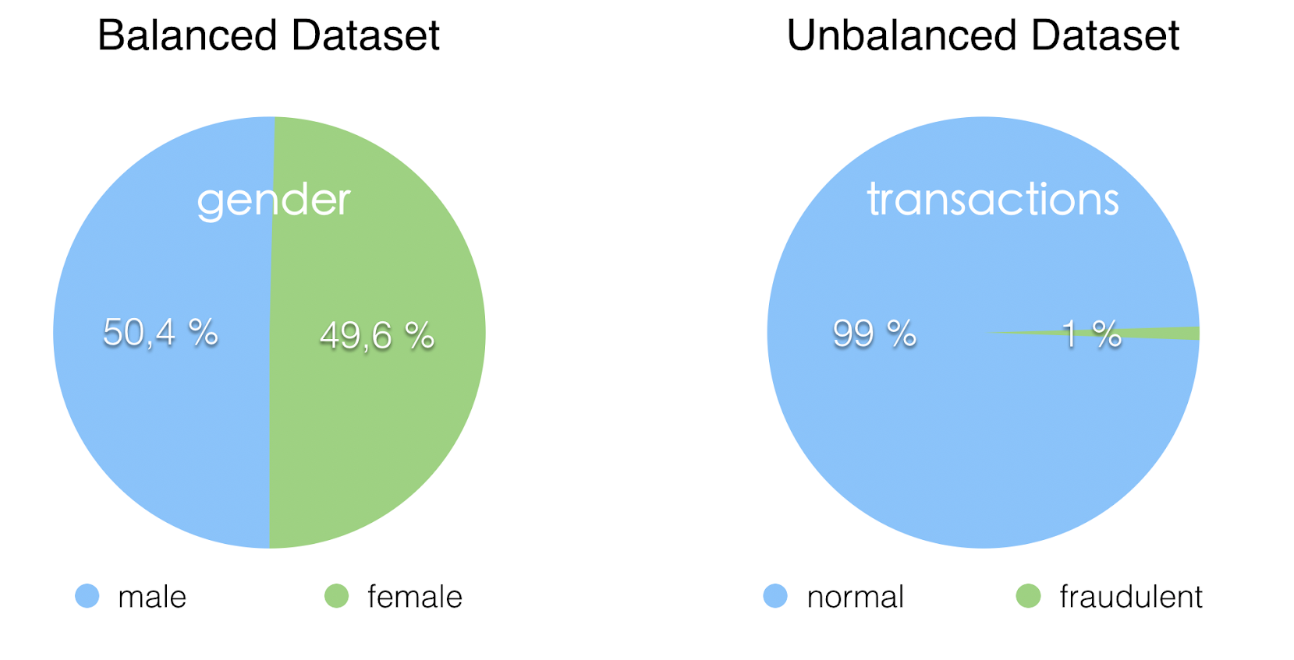

# **Oversampling and Undersampling**

Both oversampling and undersampling involve introducing a bias to select more samples from one class than from another, to compensate for an imbalance that is either already present in the data, or likely to develop if a purely random sample were taken. Data Imbalance can be of the following types:

1. Under-representation of a class in one or more important predictor variables. Suppose, to address the question of gender discrimination, we have survey data on salaries within a particular field, e.g., computer software. It is known women are under-represented considerably in a random sample of software engineers, which would be important when adjusting for other variables such as years employed and current level of seniority. Suppose only 20% of software engineers are women, i.e., males are 4 times as frequent as females. If we were designing a survey to gather data, we would survey 4 times as many females as males, so that in the final sample, both genders will be represented equally. (See also Stratified Sampling.)
2. Under-representation of one class in the outcome (dependent) variable. Suppose we want to predict, from a large clinical dataset, which patients are likely to develop a particular disease (e.g., diabetes). Assume, however, that only 10% of patients go on to develop the disease. Suppose we have a large existing dataset. We can then pick 9 times the number of patients who did not go on to develop the disease for every one patient who did.

Oversampling is generally employed more frequently than undersampling, especially when the detailed data has yet to be collected by survey, interview or otherwise. Undersampling is employed much less frequently. Overabundance of already collected data became an issue only in the "Big Data" era, and the reasons to use undersampling are mainly practical and related to resource costs. Specifically, while one needs a suitably large sample size to draw valid statistical conclusions, the data must be cleaned before it can be used. Cleansing typically involves a significant human component, and is typically specific to the dataset and the analytical problem, and therefore takes time and money. For example:

1. Domain experts will suggest dataset-specific means of validation involving not only intra-variable checks (permissible values, maximum and minimum possible valid values, etc.), but also inter-variable checks. For example, the individual components of a differential white blood cell count must all add up to 100, because each is a percentage of the total.
2. Data that is embedded in narrative text (e.g., interview transcripts) must be manually coded into discrete variables that a statistical or machine-learning package can deal with. The more the data, the more the coding effort. (Sometimes, the coding can be done through software, but somebody must often write a custom, one-off program to do so, and the program's output must be tested for accuracy, in terms of false positive and false negative results.) For these reasons, one will typically cleanse only as much data as is needed to answer a question with reasonable statistical confidence (see Sample Size), but not more than that.


Ref: [wikipedia](https://en.wikipedia.org/wiki/Oversampling_and_undersampling_in_data_analysis)

# Setting Up

In [2]:
%%capture
!pip install scikit-learn==1.2.2
!pip install imblearn

In [3]:
from sklearn.model_selection import cross_val_score

from sklearn import metrics
from collections import Counter

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
import pandas as pd
import numpy as np
from matplotlib import rcParams
import plotly.express as px
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")



from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.metrics import ConfusionMatrixDisplay


# **Data Context**
It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

Content
The dataset contains transactions made by credit cards in September 2013 by European cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

In [5]:
card_df = pd.read_csv('/content/drive/MyDrive/creditcard.csv/creditcard.csv')
card_org = card_df.copy()

In [ ]:
card_df.head().T

,0,1,2,3,4
Time,0.000000,0.000000,1.000000,1.000000,2.000000
V1,-1.359807,1.191857,-1.358354,-0.966272,-1.158233
V2,-0.072781,0.266151,-1.340163,-0.185226,0.877737
V3,2.536347,0.166480,1.773209,1.792993,1.548718
V4,1.378155,0.448154,0.379780,-0.863291,0.403034
V5,-0.338321,0.060018,-0.503198,-0.010309,-0.407193
V6,0.462388,-0.082361,1.800499,1.247203,0.095921
V7,0.239599,-0.078803,0.791461,0.237609,0.592941
V8,0.098698,0.085102,0.247676,0.377436,-0.270533
V9,0.363787,-0.255425,-1.514654,-1.387024,0.817739


In [ ]:
colors = ['Green', 'orange']
labels = ['Normal','Fraud']
values = card_df['Class'].value_counts()/card_df['Class'].shape[0]
fig = go.Figure(data=[go.Pie(labels = labels,
                             values=values,hole=.3)])
fig.update_traces(hoverinfo='label+percent', textinfo='percent', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='white', width=0.1)))
fig.update_layout(
    title_text="Credit Card Fraud",
    title_font_color="white",
    legend_title_font_color="yellow",
    paper_bgcolor="black",
    plot_bgcolor='black',
    font_color="white",
)
fig.show()

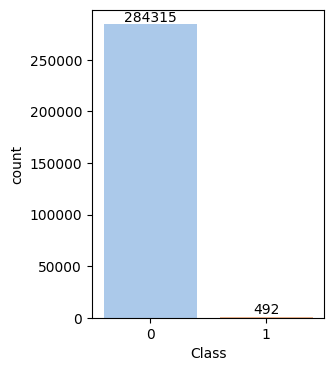

In [ ]:
plt.figure(figsize=(3,4))
ax = sns.countplot(x='Class',data=card_df,palette="pastel")
for i in ax.containers:
    ax.bar_label(i,)

**Observation:**

In the case of the Credit Card Fraud dataset, severe imbalance is observed.

In [ ]:
card_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

OK! There is no missing value!


All features are numerical! So, there is no need to consider categorical feature engineering!

In [ ]:
card_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


**Dropping duplicated values**

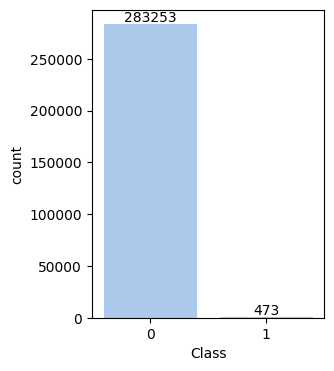

In [ ]:
plt.figure(figsize=(3,4))
ax = sns.countplot(x='Class',data=df,palette="pastel")
for i in ax.containers:
    ax.bar_label(i,)

In [7]:
df = card_df.copy()

In [8]:
df.drop_duplicates(inplace=True)
print("Duplicated values dropped succesfully")
print("*" * 50)

Duplicated values dropped succesfully
**************************************************


In [9]:
df = df.drop('Time', axis=1)

# Checking for outliers

In [10]:
numeric_columns = (list(df.loc[:, 'V1':'Amount']))

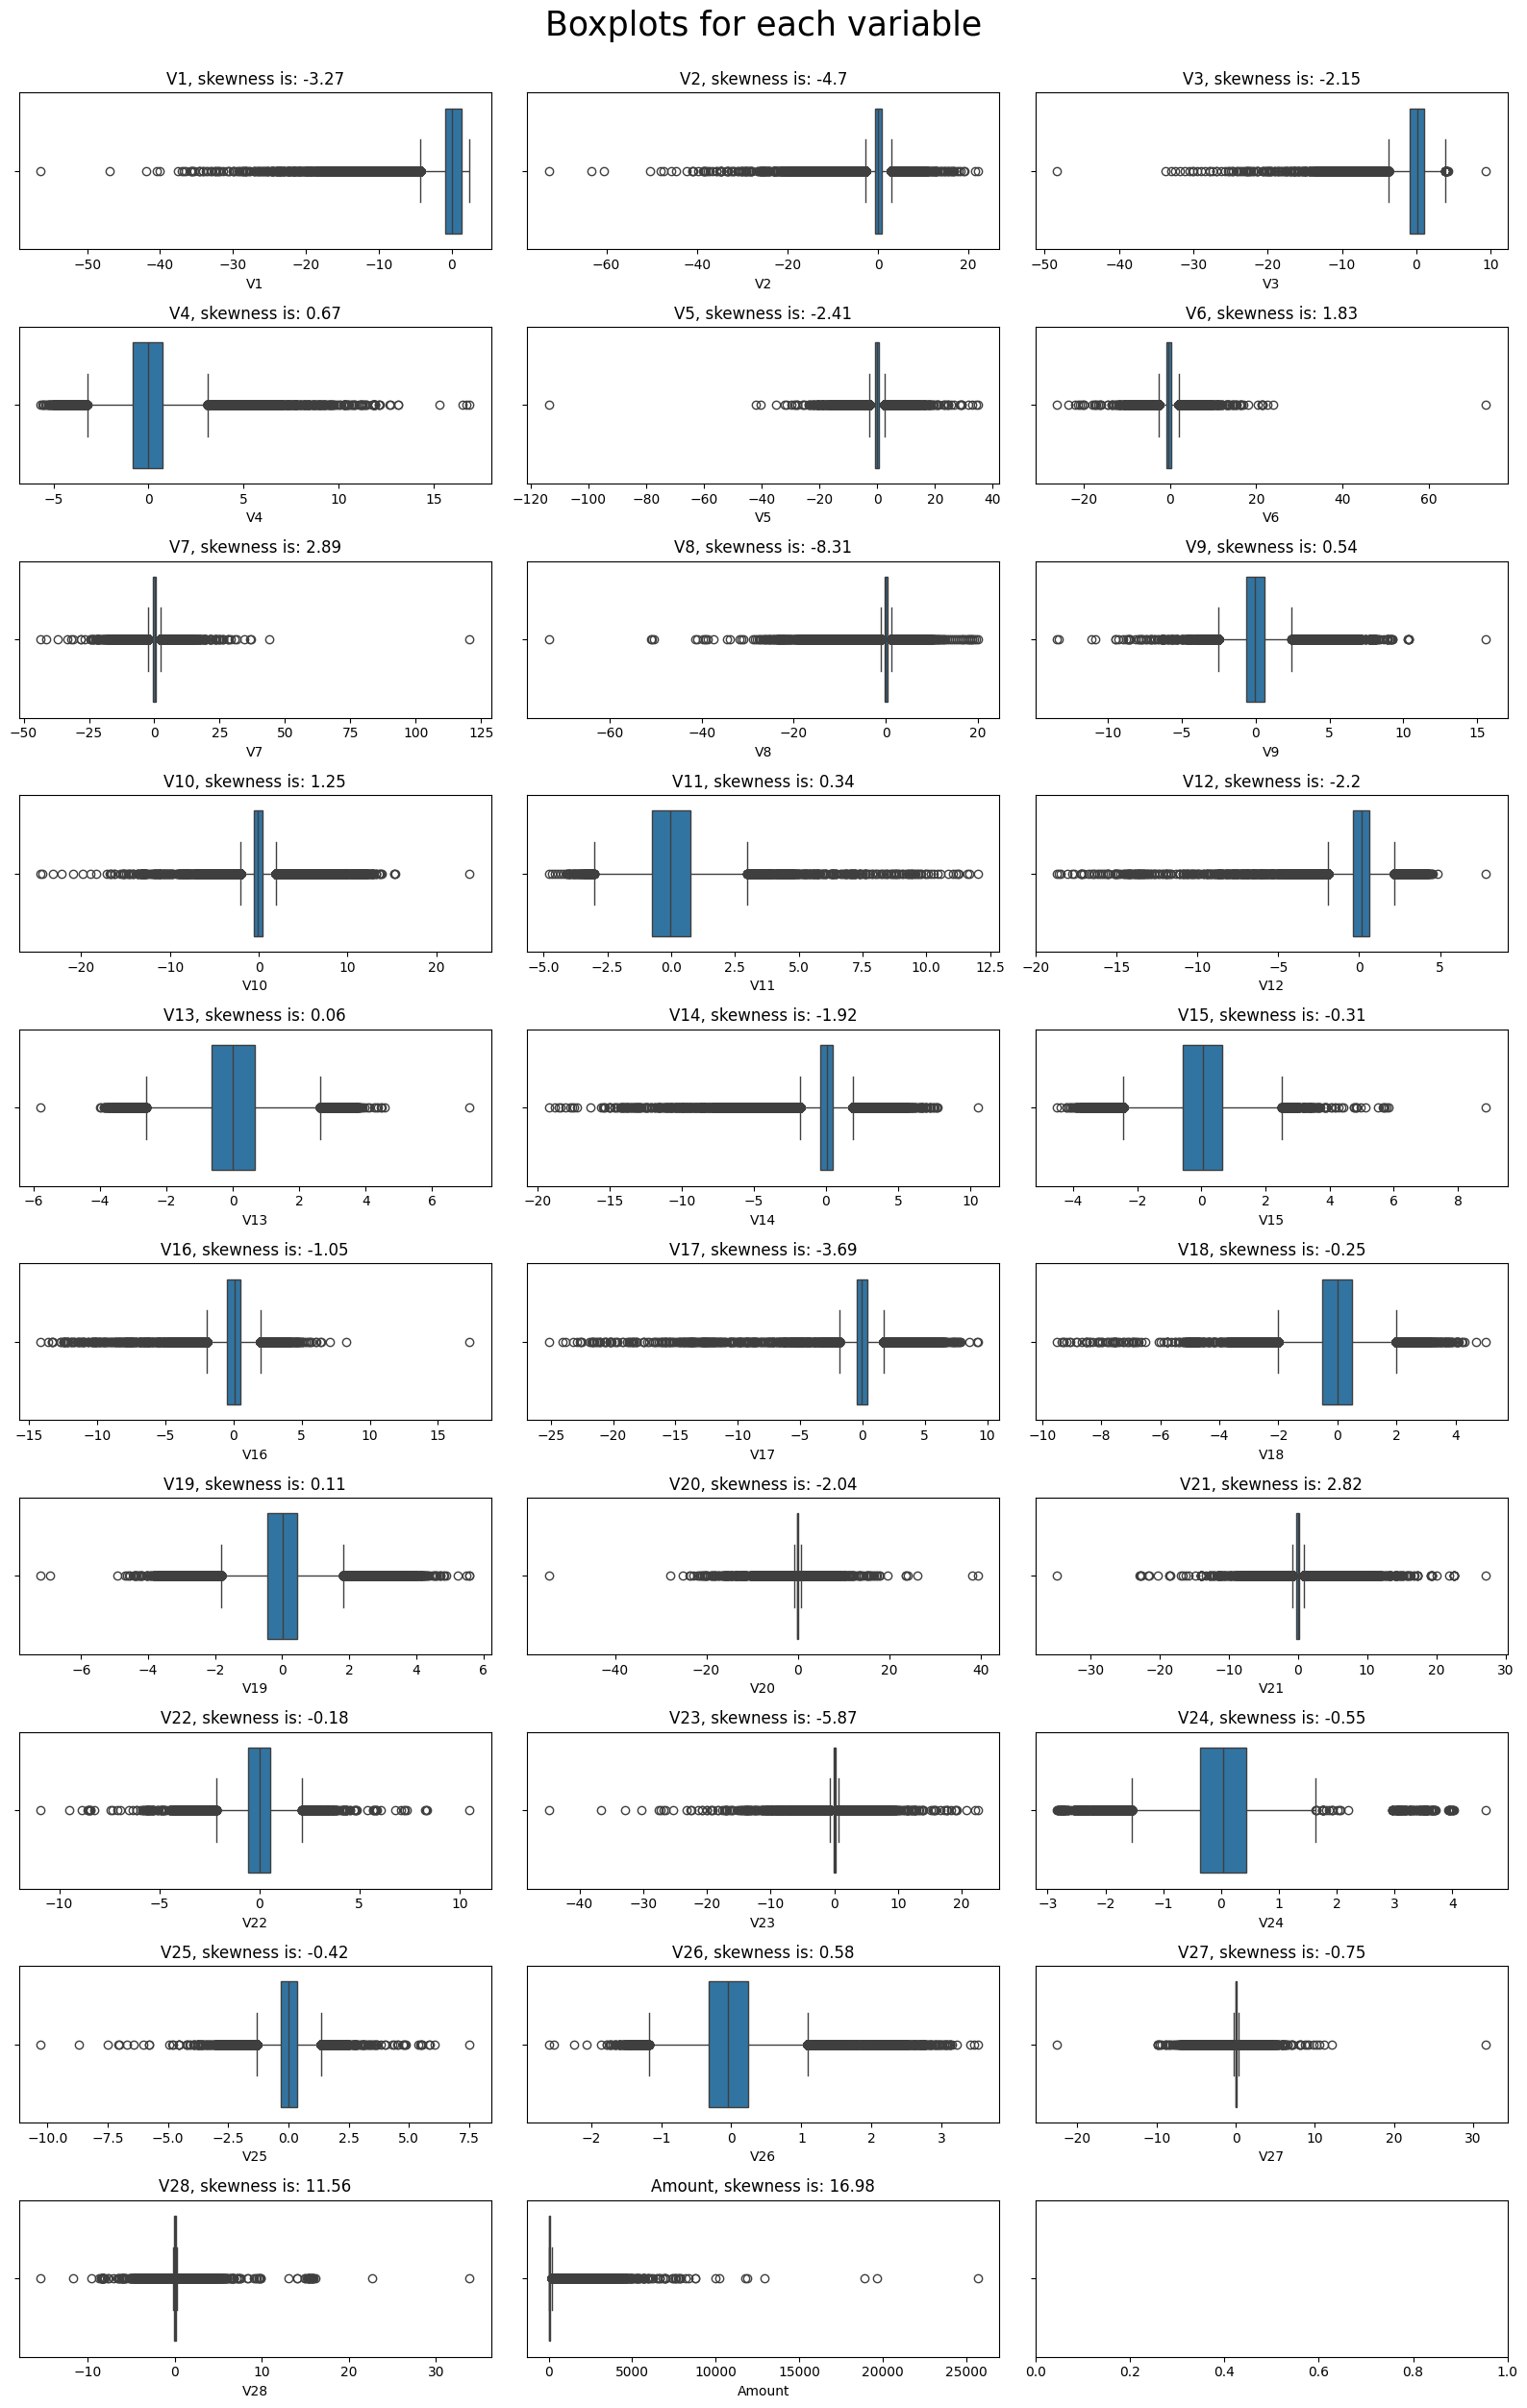

In [ ]:
# checking boxplots
def boxplots_custom(dataset, columns_list, rows, cols, suptitle):
    fig, axs = plt.subplots(rows, cols, sharey=True, figsize=(16,25))
    fig.suptitle(suptitle,y=1, size=25)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        sns.boxplot(data=dataset[data], orient='h', ax=axs[i])
        axs[i].set_title(data + ', skewness is: '+str(round(dataset[data].skew(axis = 0, skipna = True),2)))

boxplots_custom(dataset=df, columns_list=numeric_columns, rows=10, cols=3, suptitle='Boxplots for each variable')
plt.tight_layout()

# Observation:

We can see that it is skewed as shown in the pictures above.

# Inter Quartile Range (IQR)
We have a significant problems with outliers:

1. huge outliers;

2. higly skewed data;

3. a lot of outliers.

Tukey’s (1977) technique is used to detect outliers in skewed or non bell-shaped data since it makes no distributional assumptions. However, Tukey’s method may not be appropriate for a small sample size. The general rule is that anything not in the range of (Q1 - 1.5 IQR) and (Q3 + 1.5 IQR) is an outlier, and can be removed.

Inter Quartile Range (IQR) is one of the most extensively used procedure for outlier detection and removal.

Procedure:

Find the first quartile, Q1.
Find the third quartile, Q3.
Calculate the IQR. IQR = Q3-Q1.
Define the normal data range with lower limit as Q1–1.5 IQR and upper limit as Q3+1.5 IQR

In [ ]:
def IQR_method (df,n,features):
    """
    Takes a dataframe and returns an index list corresponding to the observations
    containing more than n outliers according to the Tukey IQR method.
    """
    outlier_list = []

    for column in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[column], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[column],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        # outlier step
        outlier_step = 1.5 * IQR
        # Determining a list of indices of outliers
        outlier_list_column = df[(df[column] < Q1 - outlier_step) | (df[column] > Q3 + outlier_step )].index
        # appending the list of outliers
        outlier_list.extend(outlier_list_column)

    # selecting observations containing more than x outliers
    outlier_list = Counter(outlier_list)
    multiple_outliers = list( k for k, v in outlier_list.items() if v > n )

    # Calculate the number of records below and above lower and above bound value respectively
    out1 = df[df[column] < Q1 - outlier_step]
    out2 = df[df[column] > Q3 + outlier_step]

    print('Total number of deleted outliers is:', out1.shape[0]+out2.shape[0])

    return multiple_outliers

In [ ]:
# detecting outliers
Outliers_IQR = IQR_method(df,1,numeric_columns)

# dropping outliers
df_out = df.drop(Outliers_IQR, axis = 0).reset_index(drop=True)

Total number of deleted outliers is: 31685


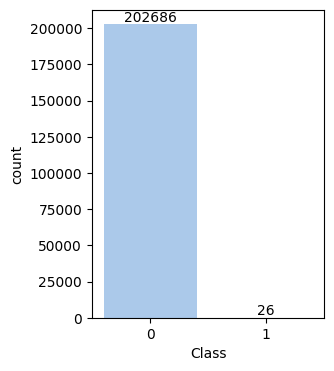

In [ ]:
plt.figure(figsize=(3,4))
ax = sns.countplot(x='Class',data=df_out,palette="pastel")
for i in ax.containers:
    ax.bar_label(i,)

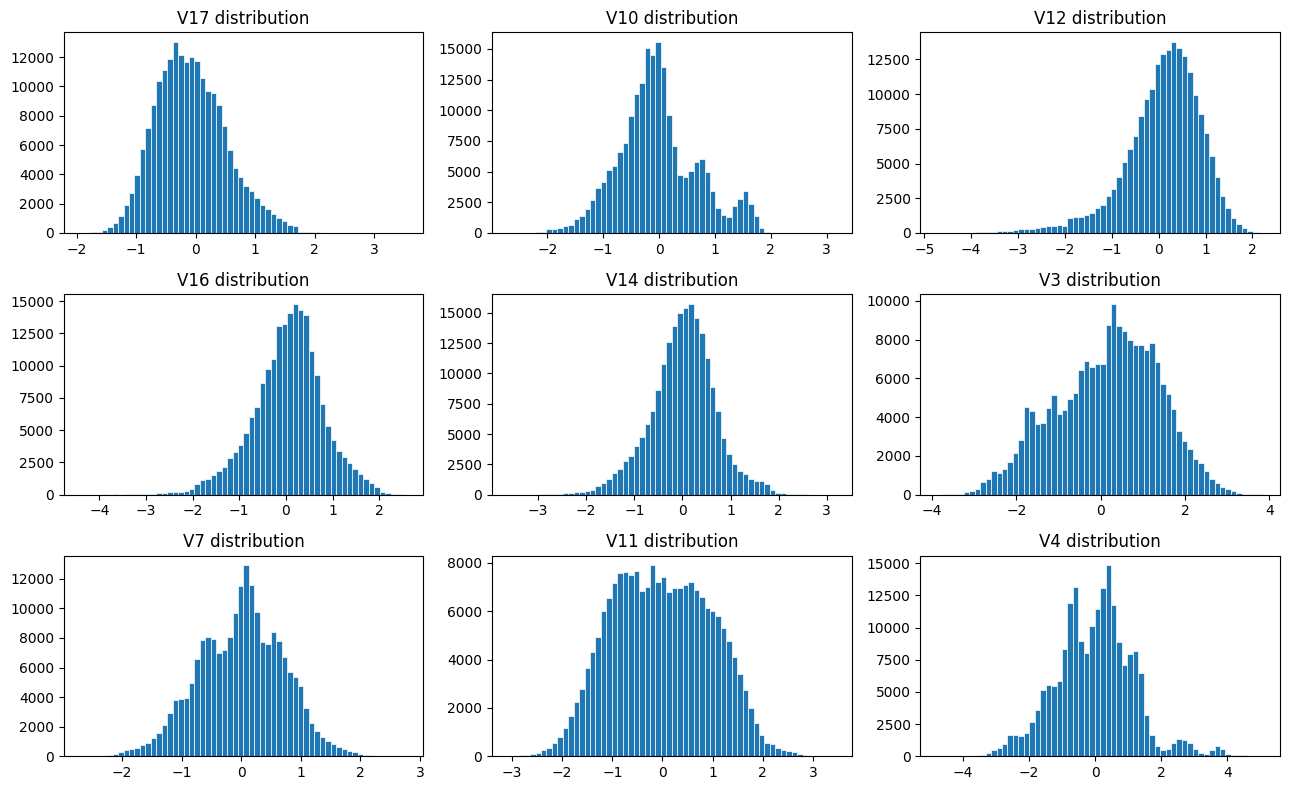

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=3,figsize=(13,8))

axes[0,0].hist(df_out['V17'], bins=60, linewidth=0.5, edgecolor="white")
axes[0,0].set_title("V17 distribution");

axes[0,1].hist(df_out['V10'], bins=60, linewidth=0.5, edgecolor="white")
axes[0,1].set_title("V10 distribution");

axes[0,2].hist(df_out['V12'], bins=60, linewidth=0.5, edgecolor="white")
axes[0,2].set_title("V12 distribution");

axes[1,0].hist(df_out['V16'], bins=60, linewidth=0.5, edgecolor="white")
axes[1,0].set_title("V16 distribution");

axes[1,1].hist(df_out['V14'], bins=60, linewidth=0.5, edgecolor="white")
axes[1,1].set_title("V14 distribution");

axes[1,2].hist(df_out['V3'], bins=60, linewidth=0.5, edgecolor="white")
axes[1,2].set_title("V3 distribution");

axes[2,0].hist(df_out['V7'], bins=60, linewidth=0.5, edgecolor="white")
axes[2,0].set_title("V7 distribution");

axes[2,1].hist(df_out['V11'], bins=60, linewidth=0.5, edgecolor="white")
axes[2,1].set_title("V11 distribution");

axes[2,2].hist(df_out['V4'], bins=60, linewidth=0.5, edgecolor="white")
axes[2,2].set_title("V4 distribution");

plt.tight_layout()

# Observation:

It can be seen that the skewness has improved a lot as shown in the pictures above.

# Checking Correlations

First, draw a heatmap to find features that are related to classes.

In [ ]:
plt.figure(figsize=(20,20))
corr=df_out.corr().round(1)
fig = px.imshow(corr)
fig.update_layout(
    title_text="Credit Card Fraud",
    title_font_color="white",
    legend_title_font_color="yellow",
    paper_bgcolor="black",
    plot_bgcolor='black',
    font_color="white",
)
fig.show()

<Figure size 2000x2000 with 0 Axes>

# Observation:

No strong correlation with target(class) compared to other features.

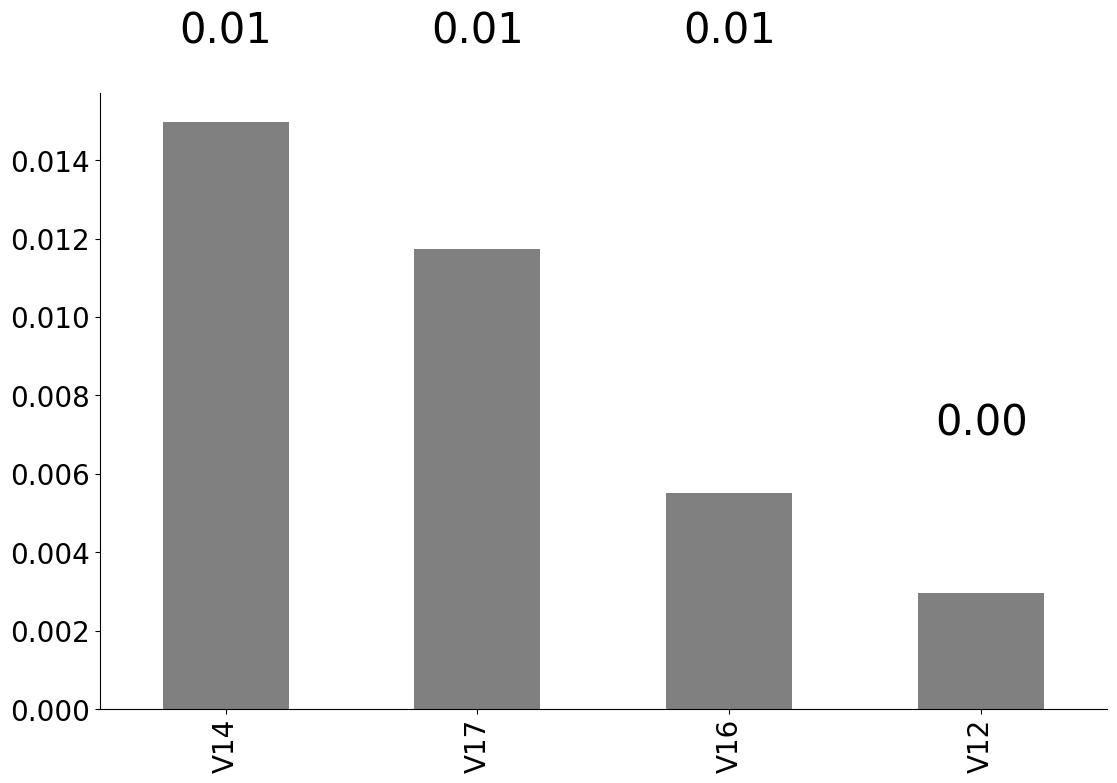

In [ ]:
features = [
     "V12", "V14", "V16", "V17",
]

plt.figure(figsize=(13,8))
# Calculate the correlation with the 'Class' column
correlations = df_out[features].corrwith(df_out['Class']).abs()
correlations_sorted = correlations.sort_values(ascending=False)

# Plotting
ax = correlations_sorted.plot(kind='bar', color='grey', fontsize=20)

# Add text annotations for bar heights
for p in ax.patches:
    height = p.get_height().round(2)
    ax.text(p.get_x() + p.get_width() / 2., height + 0.007, f'{height:.2f}', ha='center', size=30)

sns.despine()
plt.show()


# Stratified splitting


Stratified splitting means that when you generate a training / validation dataset split, it will attempt to keep the same percentages of classes in each split.

These dataset divisions are usually generated randomly according to a target variable. However, when doing so, the proportions of the target variable among the different splits can differ, especially in the case of small datasets.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 283726 entries, 0 to 284806
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      283726 non-null  float64
 1   V2      283726 non-null  float64
 2   V3      283726 non-null  float64
 3   V4      283726 non-null  float64
 4   V5      283726 non-null  float64
 5   V6      283726 non-null  float64
 6   V7      283726 non-null  float64
 7   V8      283726 non-null  float64
 8   V9      283726 non-null  float64
 9   V10     283726 non-null  float64
 10  V11     283726 non-null  float64
 11  V12     283726 non-null  float64
 12  V13     283726 non-null  float64
 13  V14     283726 non-null  float64
 14  V15     283726 non-null  float64
 15  V16     283726 non-null  float64
 16  V17     283726 non-null  float64
 17  V18     283726 non-null  float64
 18  V19     283726 non-null  float64
 19  V20     283726 non-null  float64
 20  V21     283726 non-null  float64
 21  V22     283726 

In [ ]:
df_out.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202712 entries, 0 to 202711
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      202712 non-null  float64
 1   V2      202712 non-null  float64
 2   V3      202712 non-null  float64
 3   V4      202712 non-null  float64
 4   V5      202712 non-null  float64
 5   V6      202712 non-null  float64
 6   V7      202712 non-null  float64
 7   V8      202712 non-null  float64
 8   V9      202712 non-null  float64
 9   V10     202712 non-null  float64
 10  V11     202712 non-null  float64
 11  V12     202712 non-null  float64
 12  V13     202712 non-null  float64
 13  V14     202712 non-null  float64
 14  V15     202712 non-null  float64
 15  V16     202712 non-null  float64
 16  V17     202712 non-null  float64
 17  V18     202712 non-null  float64
 18  V19     202712 non-null  float64
 19  V20     202712 non-null  float64
 20  V21     202712 non-null  float64
 21  V22     20

In [13]:
X = df.drop('Class', axis=1)
y = df['Class']

In [14]:

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size = 0.3, random_state = 0)

# Oversample/undersample before or after splitting data?

The rule of thumb is: never mess up with your test set. Always split into test and train sets BEFORE trying oversampling/undersampling techniques!

Oversampling before splitting the data can allow the exact same observations to be present in both the test and train sets. This can allow model to simply memorize specific data points and cause overfitting and poor generalization to the test data. Data leakage can cause you to create overly optimistic if not completely invalid predictive models.

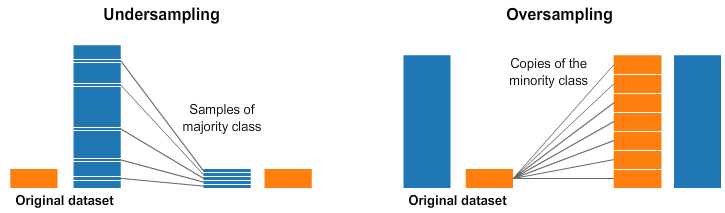

# Feature scaling

In [11]:
from sklearn.preprocessing import StandardScaler

# Creating function for scaling
def Standard_Scaler (df, col_names):
    features = df[col_names]
    scaler = StandardScaler().fit(features.values)
    features = scaler.transform(features.values)
    df[col_names] = features

    return df

In [15]:
col_names = ['Amount']
X_train = Standard_Scaler (X_train, col_names)
X_test = Standard_Scaler (X_test, col_names)

# Baseline (no oversampling)

1. **Cross-validation**


The best model is not the one that gives accurate predictions on the training data, but the one which gives good predictions on the new data and avoids overfitting and underfitting.

Cross-validation is a resampling procedure used to evaluate machine learning models on a limited data sample. The procedure has a single parameter called k that refers to the number of groups that a given data sample is to be split into. As such, the procedure is often called k-fold cross-validation.

The purpose of cross–validation is to test the ability of a machine learning model to predict new data.

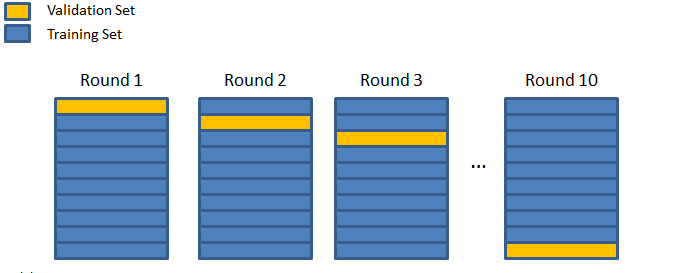

2. Stratified K-Fold CV (Cross-Validation)
Stratification is used when the datasets contain unbalanced classes. Therefore if we cross-validate with a normal technique it may produce subsamples that have a varying distribution of classes. Some unbalanced samples may produce exceptionally high scores leading to a high cross-validation score overall, which is undesirable. Therefore we create stratified subsamples that preserve the class frequencies in the individual folds to ensure that we are able to get a clear picture of the model performance.

3. Oversample/undersample and Cross Validation
If you want to undersample or oversample your data you shouldn't do it before cross validating because you will be directly influencing the validation set before implementing cross-validation causing a "data leakage" problem.

Exactly like we should do feature selection inside the cross validation loop, we should also oversample inside the loop.

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier

kf = StratifiedKFold(n_splits=5, shuffle=False)

In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=13)

# Optimising for Recall

Recall: The ability of a model to find all the relevant cases within a data set. The number of true positives divided by the number of true positives plus the number of false negatives.

In most high-risk detection cases (like cancer), recall is a more important evaluation metric than precision.

In the case of credit card fraud detection, we want to avoid false negatives as much as possible. Fraud transactions cost us a lot and thus we want to take appropriate measures to prevent them. A false negative case means that a fraud-positive transaction is assessed to genuine transaction, which is detrimental. In this use case, false positives (a genuine transaction as fraud-positive) are not as important as preventing a fraud.

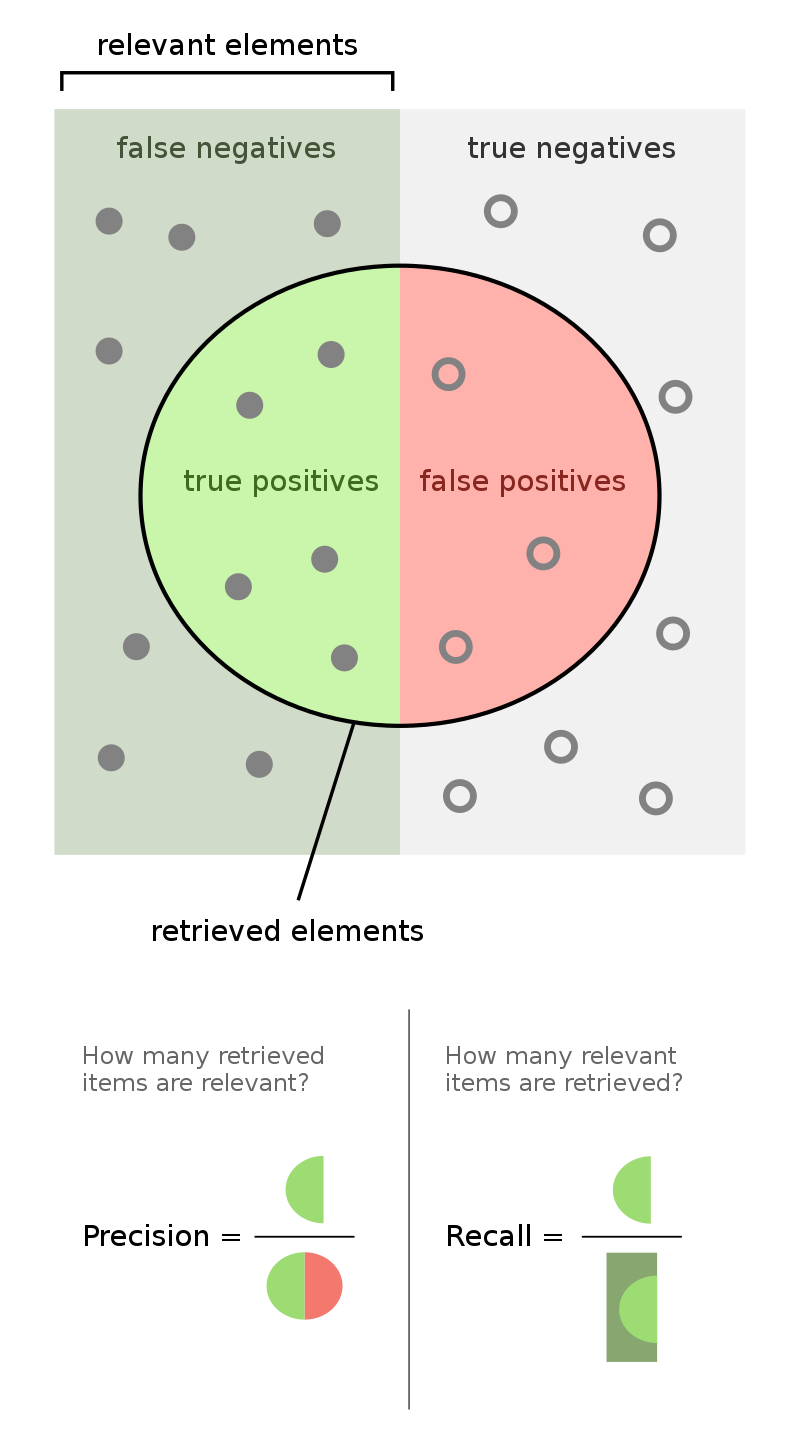

In [ ]:
score = cross_val_score(rf, X_train, y_train, cv=kf, scoring='recall')
print("Cross Validation Recall scores are: {}".format(score))
print("Average Cross Validation Recall score: {}".format(score.mean()))

Cross Validation Recall scores are: [0.83333333 0.6969697  0.76119403 0.81818182 0.71212121]
Average Cross Validation Recall score: 0.7643600180913614


# When is Precision more important over Recall?
Precision is more important than Recall when you would like to have less False Positives in trade off to have more False Negatives. Meaning, getting a False Positive is very costly, and a False Negative is not as much.

Imagine a zombie apocalypse. You would try to accept as many healthy people as you can into your safe zone, but you really dont want to mistakenly pass a zombie. The true positive is this case is a healthy person and false positive a zombie. It is more important to avoid zombies than accepting more healthy people. So you create a method that causes some of the healthy people mistakenly not to get into the safe zone, but this is the cost of not letting a zombie in.

# Hyperparameter Tuning Using GridSearchCV

Hyperparameter tuning is the process of tuning the parameters present as the tuples while we build machine learning models. These parameters are defined by us. Machine learning algorithms never learn these parameters. These can be tuned in different step.

GridSearchCV is a technique for finding the optimal hyperparameter values from a given set of parameters in a grid. It's essentially a cross-validation technique. The model as well as the parameters must be entered. After extracting the best parameter values, predictions are made.

The “best” parameters that GridSearchCV identifies are technically the best that could be produced, but only by the parameters that you included in your parameter grid.

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [4, 6, 10, 12],
    'random_state': [13]
}

In [ ]:


grid_rf = GridSearchCV(rf, param_grid=params, cv=kf,
                          scoring='recall').fit(X_train, y_train)

In [ ]:
print('Best parameters:', grid_rf.best_params_)
print('Best score:', grid_rf.best_score_)

Best parameters: {'max_depth': 12, 'n_estimators': 50, 'random_state': 13}
Best score: 0.7704206241519674


We have about 77% Recall on one of our models before oversampling. Let's check the test set scores.

In [ ]:
y_pred = grid_rf.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, accuracy_score
cm = confusion_matrix(y_test, y_pred)

rf_Recall = recall_score(y_test, y_pred)
rf_Precision = precision_score(y_test, y_pred)
rf_f1 = f1_score(y_test, y_pred)
rf_accuracy = accuracy_score(y_test, y_pred)

print(cm)

[[84974     2]
 [   27   115]]


In [ ]:
ndf = [(rf_Recall, rf_Precision, rf_f1, rf_accuracy)]

rf_score = pd.DataFrame(data = ndf, columns=['Recall','Precision','F1 Score', 'Accuracy'])
rf_score.insert(0, 'Random Forest with', 'No Under/Oversampling')
rf_score

,Random Forest with,Recall,Precision,F1 Score,Accuracy
0,No Under/Oversampling,0.809859,0.982906,0.888031,0.999659


Random Resampling Imbalanced Datasets¶
Resampling involves creating a new transformed version of the training dataset in which the selected examples have a different class distribution.

There are two main approaches to random resampling for imbalanced classification; they are oversampling and undersampling.

Random Oversampling: Randomly duplicate examples in the minority class.
Random Undersampling: Randomly delete examples in the majority class.
They are referred to as “naive resampling” methods because they assume nothing about the data and no heuristics are used. This makes them simple to implement and fast to execute, which is desirable for very large and complex datasets.

Important
Change to the class distribution should be only applied to the training dataset. The intent is to influence the fit of the models. The resampling is not applied to the test or holdout dataset used to evaluate the performance of a model.

In [ ]:
from imblearn.over_sampling import RandomOverSampler
# define oversampling strategy
ros = RandomOverSampler(random_state=42)

In [ ]:
X_over, y_over = ros.fit_resample(X_train, y_train)

In [ ]:
print('Genuine:', y_over.value_counts()[0], '/', round(y_over.value_counts()[0]/len(y_over) * 100,2), '% of the dataset')
print('Frauds:', y_over.value_counts()[1], '/',round(y_over.value_counts()[1]/len(y_over) * 100,2), '% of the dataset')

Genuine: 198277 / 50.0 % of the dataset
Frauds: 198277 / 50.0 % of the dataset


Imbalanced-Learn Pipeline
The purpose of the pipeline is to assemble several steps that can be cross-validated together while setting different parameters.

During the cross-validation process we should split into training and validation segments. Then, on each segment, we should:

Oversample the minority class.
Train the classifier on the training segment.
Validate the classifier on the remaining segment.
Pipeline is a great way to do this in a smart way.

The imblearn package contains a lot of different samplers for oversampling and undersampling. These samplers can not be placed in a standard sklearn pipeline.

To allow for using a pipeline with these samplers, the imblearn package also implements an extended pipeline which has a bunch of extra functions to do with transforming and sampling.

# Training model

In [ ]:
from imblearn.pipeline import Pipeline, make_pipeline

random_overs_pipeline = make_pipeline(RandomOverSampler(random_state=42),
                              RandomForestClassifier(n_estimators=100, random_state=13))

In [ ]:
score2 = cross_val_score(random_overs_pipeline, X_train, y_train, scoring='recall', cv=kf)
print("Cross Validation Recall Scores are: {}".format(score2))
print("Average Cross Validation Recall score: {}".format(score2.mean()))

Cross Validation Recall Scores are: [0.8030303  0.6969697  0.74626866 0.83333333 0.75757576]
Average Cross Validation Recall score: 0.7674355495251017


8.1.3 GridSearchCV

In [ ]:
new_params = {'randomforestclassifier__' + key: params[key] for key in params}
grid_over_rf = GridSearchCV(random_overs_pipeline, param_grid=new_params, cv=kf, scoring='recall',
                        return_train_score=True)

In [ ]:

grid_over_rf.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('randomoversampler',
                                        RandomOverSampler(random_state=42)),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=13))]),
             param_grid={'randomforestclassifier__max_depth': [4, 6, 10, 12],
                         'randomforestclassifier__n_estimators': [50, 100, 200],
                         'randomforestclassifier__random_state': [13]},
             return_train_score=True, scoring='recall')

In [ ]:
print('Best parameters:', grid_over_rf.best_params_)
print('Best score:', grid_over_rf.best_score_)

Best parameters: {'randomforestclassifier__max_depth': 4, 'randomforestclassifier__n_estimators': 200, 'randomforestclassifier__random_state': 13}
Best score: 0.8549977385798281


Confusion matrix and scores

In [ ]:
y_pred = grid_over_rf.best_estimator_.named_steps['randomforestclassifier'].predict(X_test)

In [ ]:
cm = confusion_matrix(y_test, y_pred)

over_rf_Recall = recall_score(y_test, y_pred)
over_rf_Precision = precision_score(y_test, y_pred)
over_rf_f1 = f1_score(y_test, y_pred)
over_rf_accuracy = accuracy_score(y_test, y_pred)

print(cm)

[[84475   501]
 [   16   126]]


In [ ]:
ndf = [(over_rf_Recall, over_rf_Precision, over_rf_f1, over_rf_accuracy)]

over_rf_score = pd.DataFrame(data = ndf, columns=['Recall','Precision','F1 Score', 'Accuracy'])
over_rf_score.insert(0, 'Random Forest with', 'Random Oversampling')
over_rf_score

,Random Forest with,Recall,Precision,F1 Score,Accuracy
0,Random Oversampling,0.887324,0.200957,0.327698,0.993926


Random Undersampling Imbalanced Datasets
Random undersampling involves randomly selecting examples from the majority class to delete from the training dataset. This approach may be more suitable for those datasets where there is a class imbalance although a sufficient number of examples in the minority class, such a useful model can be fit.

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
# define oversampling strategy
rus = RandomUnderSampler(random_state=42)

In [ ]:
# fit and apply the transform
X_under, y_under = rus.fit_resample(X_train, y_train)

In [ ]:
print('Genuine:', y_under.value_counts()[0], '/', round(y_under.value_counts()[0]/len(y_under) * 100,2), '% of the dataset')
print('Frauds:', y_under.value_counts()[1], '/',round(y_under.value_counts()[1]/len(y_under) * 100,2), '% of the dataset')

Genuine: 331 / 50.0 % of the dataset
Frauds: 331 / 50.0 % of the dataset


SMOTE (Synthetic Minority Oversampling Technique)
SMOTE (Synthetic Minority Oversampling Technique) synthesize elements for the minority class. SMOTE works by selecting examples that are close in the feature space, drawing a line between the examples in the feature space and drawing a new sample at a point along that line.

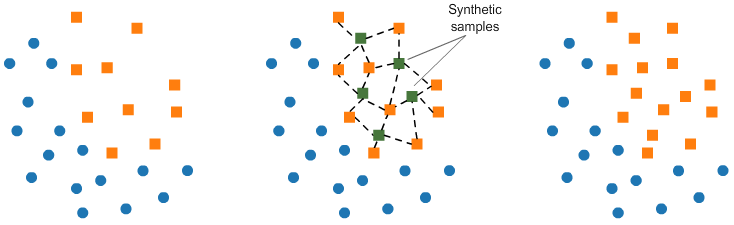

In [ ]:
from imblearn.over_sampling import SMOTE

smote_pipeline = make_pipeline(SMOTE(random_state=42),
                              RandomForestClassifier(n_estimators=100, random_state=13))

In [ ]:
score3 = cross_val_score(smote_pipeline, X_train, y_train, scoring='recall', cv=kf)
print("Cross Validation Recall Scores are: {}".format(score3))
print("Average Cross Validation Recall score: {}".format(score3.mean()))

Cross Validation Recall Scores are: [0.84848485 0.74242424 0.79104478 0.84848485 0.77272727]
Average Cross Validation Recall score: 0.8006331976481229


In [ ]:
new_params = {'randomforestclassifier__' + key: params[key] for key in params}
smote_rf = GridSearchCV(smote_pipeline, param_grid=new_params, cv=kf, scoring='recall',
                        return_train_score=True)

In [ ]:

smote_rf.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('smote', SMOTE(random_state=42)),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=13))]),
             param_grid={'randomforestclassifier__max_depth': [4, 6, 10, 12],
                         'randomforestclassifier__n_estimators': [50, 100, 200],
                         'randomforestclassifier__random_state': [13]},
             return_train_score=True, scoring='recall')

In [ ]:
print('Best parameters:', smote_rf.best_params_)
print('Best score:', smote_rf.best_score_)

Best parameters: {'randomforestclassifier__max_depth': 6, 'randomforestclassifier__n_estimators': 50, 'randomforestclassifier__random_state': 13}
Best score: 0.8640434192672999


Confusion matrix and scores

In [ ]:
y_pred = smote_rf.best_estimator_.named_steps['randomforestclassifier'].predict(X_test)

In [ ]:
cm = confusion_matrix(y_test, y_pred)

smote_rf_Recall = recall_score(y_test, y_pred)
smote_rf_Precision = precision_score(y_test, y_pred)
smote_rf_f1 = f1_score(y_test, y_pred)
smote_rf_accuracy = accuracy_score(y_test, y_pred)

print(cm)

[[84496   480]
 [   17   125]]


In [ ]:
ndf = [(smote_rf_Recall, smote_rf_Precision, smote_rf_f1, smote_rf_accuracy)]

smote_rf_score = pd.DataFrame(data = ndf, columns=['Recall','Precision','F1 Score', 'Accuracy'])
smote_rf_score.insert(0, 'Random Forest with', 'SMOTE Oversampling')
smote_rf_score

,Random Forest with,Recall,Precision,F1 Score,Accuracy
0,SMOTE Oversampling,0.880282,0.206612,0.334672,0.994161


# Undersampling using Tomek Links

Tomek Links is an under-sampling technique that was developed in 1976 by Ivan Tomek. It is one of a modification from Condensed Nearest Neighbors (CNN). It can be used to find desired samples of data from the majority class that is having the lowest Euclidean distance with the minority class data and then remove it.

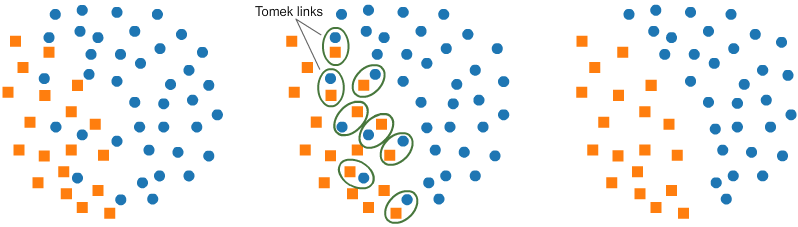

In [ ]:
from imblearn.under_sampling import TomekLinks

# define the undersampling method
#tomekU = TomekLinks(sampling_strategy='auto', n_jobs=-1)
tomekU = TomekLinks()

# fit and apply the transform
X_underT, y_underT = tomekU.fit_resample(X_train, y_train)

In [ ]:
print('Genuine:', y_underT.value_counts()[0], '/', round(y_underT.value_counts()[0]/len(y_underT) * 100,2), '% of the dataset')
print('Frauds:', y_underT.value_counts()[1], '/',round(y_underT.value_counts()[1]/len(y_underT) * 100,2), '% of the dataset')

Genuine: 198250 / 99.83 % of the dataset
Frauds: 331 / 0.17 % of the dataset


Combining SMOTE and Tomek Links¶
A combination of over-sampling the minority (abnormal) class and under-sampling the majority (normal) class can achieve better classifier performance than only under-sampling the majority class. This method was first introduced by Batista et al. (2003).

The process of SMOTE-Tomek Links is as follows.

Start of SMOTE: choose random data from the minority class.
Calculate the distance between the random data and its k nearest neighbors.
Multiply the difference with a random number between 0 and 1, then add the result to the minority class as a synthetic sample.
Repeat step number 2–3 until the desired proportion of minority class is met (End of SMOTE).
Start of Tomek Links: choose random data from the majority class.
If the random data’s nearest neighbor is the data from the minority class (i.e. create the Tomek Link), then remove the Tomek Link.

In [ ]:
from imblearn.combine import SMOTETomek

SMOTETomek_pipeline = make_pipeline(SMOTETomek(tomek=TomekLinks(sampling_strategy='majority')),
                              RandomForestClassifier(n_estimators=100, random_state=13))

In [ ]:
score4 = cross_val_score(SMOTETomek_pipeline, X_train, y_train, scoring='recall', cv=kf)
print("Cross Validation Recall Scores are: {}".format(score4))
print("Average Cross Validation Recall score: {}".format(score4.mean()))

Cross Validation Recall Scores are: [0.84848485 0.72727273 0.79104478 0.84848485 0.75757576]
Average Cross Validation Recall score: 0.7945725915875169


 GridSearchCV¶
GridSearchCV combined with SMOTE-Tomek and k-fold Cross-Validation is computationally very demanding. It takes more than 12 hours and that's impossible for Kaggle. That's why I did the computations on my local Yupyter Notebook and used best GridSearchCV parameters to fit the model.

You can find the formula for GridSearchCV below.

In [ ]:
SMOTETomek_rf = SMOTETomek_pipeline
SMOTETomek_rf.fit(X_train, y_train)

Pipeline(steps=[('smotetomek',
                 SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=13))])

Confusion matrix and scores

In [ ]:
y_pred = SMOTETomek_rf.predict(X_test)

In [ ]:
cm = confusion_matrix(y_test, y_pred)

SMOTETomek_rf_Recall = recall_score(y_test, y_pred)
SMOTETomek_rf_Precision = precision_score(y_test, y_pred)
SMOTETomek_rf_f1 = f1_score(y_test, y_pred)
SMOTETomek_rf_accuracy = accuracy_score(y_test, y_pred)

print(cm)

[[84955    21]
 [   24   118]]


In [ ]:
ndf = [(SMOTETomek_rf_Recall, SMOTETomek_rf_Precision, SMOTETomek_rf_f1, SMOTETomek_rf_accuracy)]

SMOTETomek_rf_score = pd.DataFrame(data = ndf, columns=['Recall','Precision','F1 Score', 'Accuracy'])
SMOTETomek_rf_score.insert(0, 'Random Forest with', 'SMOTE + Tomek')
SMOTETomek_rf_score

,Random Forest with,Recall,Precision,F1 Score,Accuracy
0,SMOTE + Tomek,0.830986,0.848921,0.839858,0.999471


Class weights in the models

Most of the machine learning models provide a parameter called class_weights. For example, in a random forest classifier using, class_weights we can specify a higher weight for the minority class using a dictionary.

Without weights set, the model treats each point as equally important. Weights scale the loss function. As the model trains on each point, the error will be multiplied by the weight of the point. The estimator will try to minimize error on the more heavily weighted classes, because they will have a greater effect on error, sending a stronger signal.

In [ ]:
# If you choose class_weight = "balanced",
# the classes will be weighted inversely proportional to how frequently they appear in the data.

rfb = RandomForestClassifier(n_estimators=100, random_state=13, class_weight="balanced")

In [ ]:
score5 = cross_val_score(rfb, X_train, y_train, cv=kf, scoring='recall')
print("Cross Validation Recall scores are: {}".format(score5))
print("Average Cross Validation Recall score: {}".format(score5.mean()))

Cross Validation Recall scores are: [0.78787879 0.6969697  0.68656716 0.78787879 0.6969697 ]
Average Cross Validation Recall score: 0.731252826775215


GridSearchCV

In [ ]:
grid_rfb = GridSearchCV(rfb, param_grid=params, cv=kf,
                          scoring='recall').fit(X_train, y_train)

Confusion matrix and scores

In [ ]:
y_pred = grid_rfb.predict(X_test)

In [ ]:
cm = confusion_matrix(y_test, y_pred)

grid_rfb_Recall = recall_score(y_test, y_pred)
grid_rfb_Precision = precision_score(y_test, y_pred)
grid_rfb_f1 = f1_score(y_test, y_pred)
grid_rfb_accuracy = accuracy_score(y_test, y_pred)

print(cm)

[[84552   424]
 [   18   124]]


In [ ]:
ndf = [(grid_rfb_Recall, grid_rfb_Precision, grid_rfb_f1, grid_rfb_accuracy)]

grid_rfb_score = pd.DataFrame(data = ndf, columns=['Recall','Precision','F1 Score', 'Accuracy'])
grid_rfb_score.insert(0, 'Random Forest with', 'Class weights')
grid_rfb_score

,Random Forest with,Recall,Precision,F1 Score,Accuracy
0,Class weights,0.873239,0.226277,0.35942,0.994807


Performance comparison

In [ ]:
predictions = pd.concat([grid_rfb_score], ignore_index=True, sort=False)
predictions.sort_values(by=['Recall'], ascending=False)

,Random Forest with,Recall,Precision,F1 Score,Accuracy
0,Class weights,0.873239,0.226277,0.35942,0.994807


Summary¶
SMOTE Oversampling achived best Recall score, but it cost us a lot: Precision 0,25 and F1 Score: 0,39.
The reference model without Under/Oversampling achived 0,77% Recall score.
The most advanced model 'SMOTE and Tomek' wasn't the best in Recall score.
Which model is the best? It depend on a business decision.
Can we achive better results?

Probably yes - there is much more to do when it comes to K-Fold Cross Validation and tuning hyperparameters.

14. Other Metrics
14.1 AUC-ROC Curve
AUC (Area Under The Curve) ROC (Receiver Operating Characteristics) curve.

ROC is a probability curve and AUC represents the degree or measure of separability. It tells how much the model is capable of distinguishing between classes. Higher the AUC, the better the model is at predicting 0 classes as 0 and 1 classes as 1.

The ROC curve is plotted with TPR against the FPR where TPR is on the y-axis and FPR is on the x-axis.

An excellent model has AUC near to the 1 which means it has a good measure of separability. A poor model has an AUC near 0 which means it has the worst measure of separability.

When AUC is 0.7, it means there is a 70% chance that the model will be able to distinguish between positive class and negative class.
When AUC is approximately 0.5, the model has no discrimination capacity to distinguish between positive class and negative class.
When AUC is approximately 0, the model is predicting a negative class as a positive class and vice versa.

In [ ]:
from sklearn.metrics import roc_auc_score
ROCAUCscore = roc_auc_score(y_test, y_pred)
print(f"AUC-ROC Curve for Random Forest with Class weights: {ROCAUCscore:.4f}")

AUC-ROC Curve for Random Forest with Class weights: 0.9341


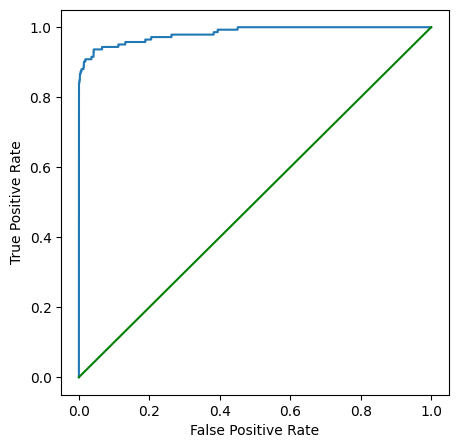

In [ ]:
y_proba = grid_rfb.predict_proba(X_test)

from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
def plot_auc_roc_curve(y_test, y_pred):
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
    roc_display.figure_.set_size_inches(5,5)
    plt.plot([0, 1], [0, 1], color = 'g')
# Plots the ROC curve using the sklearn methods - Good plot
plot_auc_roc_curve(y_test, y_proba[:, 1])


Precision-Recall Curve (PR curve)¶
The precision-recall curve shows the tradeoff between precision and recalls for different thresholds.

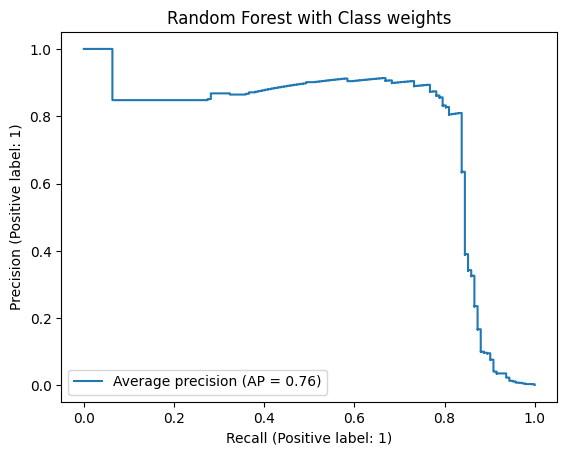

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(
    grid_rfb, X_test, y_test, name="Average precision")
_ = display.ax_.set_title("Random Forest with Class weights")

USING XGBOOST

In [ ]:
!nvidia-smi



Sun Apr 14 18:25:53 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla V100-SXM2-16GB           Off | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P0              24W / 300W |      0MiB / 16384MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [16]:
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score, GridSearchCV



In [17]:
# Setup the cross-validation strategy
kf = StratifiedKFold(n_splits=5, shuffle=False)

# Initialize XGBClassifier with GPU support
xgb = XGBClassifier(n_estimators=100, random_state=13, tree_method='gpu_hist')

In [ ]:
from sklearn.exceptions import FitFailedWarning
import warnings

warnings.filterwarnings('always', category=FitFailedWarning)
score = cross_val_score(xgb, X_train, y_train, cv=kf, scoring='recall', error_score='raise')


In [ ]:
print("Cross Validation Recall scores are: {}".format(score))
print("Average Cross Validation Recall score: {}".format(score.mean()))




Cross Validation Recall scores are: [0.8030303  0.71212121 0.7761194  0.81818182 0.71212121]
Average Cross Validation Recall score: 0.764314789687924


In [18]:
# Define hyperparameters for GridSearchCV
params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [4, 6, 10, 12],
    'random_state': [13],
    'tree_method': ['gpu_hist']  # Make sure to use GPU acceleration
}




In [19]:
grid_xgb = GridSearchCV(xgb, param_grid=params, cv=kf, scoring='recall').fit(X_train, y_train)
print('Best parameters:', grid_xgb.best_params_)
print('Best score:', grid_xgb.best_score_)



Best parameters: {'max_depth': 12, 'n_estimators': 100, 'random_state': 13, 'tree_method': 'gpu_hist'}
Best score: 0.7734056987788331


In [20]:
y_pred = grid_xgb.predict(X_test)

In [21]:
cm = confusion_matrix(y_test, y_pred)

xgb_Recall = recall_score(y_test, y_pred)
xgb_Precision = precision_score(y_test, y_pred)
xgb_f1 = f1_score(y_test, y_pred)
xgb_accuracy = accuracy_score(y_test, y_pred)

print(cm)

[[84972     4]
 [   28   114]]


In [22]:
baseline = [(xgb_Recall, xgb_Precision, xgb_f1, xgb_accuracy)]

xgb_score = pd.DataFrame(data = baseline, columns=['Recall','Precision','F1 Score', 'Accuracy'])
xgb_score.insert(0, 'XGBOOST with', 'No Under/Oversampling and scale_pos_weight')
xgb_score

,XGBOOST with,Recall,Precision,F1 Score,Accuracy
0,No Under/Oversampling and scale_pos_weight,0.802817,0.966102,0.876923,0.999624


Including scale_pos_weight parameter

In [23]:
# Define hyperparameters for GridSearchCV
params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [4, 6, 10, 12],
    'random_state': [13],
    'tree_method': ['gpu_hist'],
    'scale_pos_weight': [1, 598.84]
}

In [24]:
grid_xgb_scale = GridSearchCV(xgb, param_grid=params, cv=kf, scoring='recall').fit(X_train, y_train)
print('Best parameters:', grid_xgb_scale.best_params_)
print('Best score:', grid_xgb_scale.best_score_)



Best parameters: {'max_depth': 4, 'n_estimators': 50, 'random_state': 13, 'scale_pos_weight': 598.84, 'tree_method': 'gpu_hist'}
Best score: 0.82483039348711


In [25]:
y_pred = grid_xgb_scale.predict(X_test)

In [26]:
cm = confusion_matrix(y_test, y_pred)

xgb_Recall = recall_score(y_test, y_pred)
xgb_Precision = precision_score(y_test, y_pred)
xgb_f1 = f1_score(y_test, y_pred)
xgb_accuracy = accuracy_score(y_test, y_pred)

print(cm)

[[84897    79]
 [   21   121]]


In [27]:
baseline = [(xgb_Recall, xgb_Precision, xgb_f1, xgb_accuracy)]

xgb_scale_score = pd.DataFrame(data = baseline, columns=['Recall','Precision','F1 Score', 'Accuracy'])
xgb_scale_score.insert(0, 'XGBOOST with', 'No Under/Oversampling')
xgb_scale_score

,XGBOOST with,Recall,Precision,F1 Score,Accuracy
0,No Under/Oversampling,0.852113,0.605,0.707602,0.998825


In [28]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline, make_pipeline

random_overs_pipeline = make_pipeline(RandomOverSampler(random_state=42),
                              XGBClassifier(n_estimators=100, random_state=13, tree_method='gpu_hist'))

In [ ]:
score2 = cross_val_score(random_overs_pipeline, X_train, y_train, scoring='recall', cv=kf)
print("Cross Validation Recall Scores are: {}".format(score2))
print("Average Cross Validation Recall score: {}".format(score2.mean()))

Cross Validation Recall Scores are: [0.84848485 0.72727273 0.80597015 0.84848485 0.77272727]
Average Cross Validation Recall score: 0.8005879692446858


GridSearch

In [29]:
new_params = {'xgbclassifier__' + key: params[key] for key in params}
grid_over_xgb = GridSearchCV(random_overs_pipeline, param_grid=new_params, cv=kf, scoring='recall',
                        return_train_score=True)
grid_over_xgb.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('randomoversampler',
                                        RandomOverSampler(random_state=42)),
                                       ('xgbclassifier',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      device=None,
                                                      early_stopping_rounds=None,
                                                      enable_cat...
                                                      multi_strategy=None,
                                                      n_estimators=100,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=13, ...))]),
             param_grid={'xgbclassifier__max_depth': [4, 6, 10, 12],
                         'xgbclassifier__n_estimators': [50, 100, 200],
                         'xgbclassifier__random_state': [13],
                         'xgbclassifier__scale_pos_weight': [1, 598.84],
                         'xgbclassifier__tree_method': ['gpu_hist']},
             return_train_score=True, scoring='recall')

In [ ]:
print('Best parameters:', grid_over_xgb.best_params_)
print('Best score:', grid_over_xgb.best_score_)

Best parameters: {'xgbclassifier__max_depth': 4, 'xgbclassifier__n_estimators': 50, 'xgbclassifier__random_state': 13, 'xgbclassifier__scale_pos_weight': 598.84, 'xgbclassifier__tree_method': 'gpu_hist'}
Best score: 0.8338308457711442


In [30]:
y_pred = grid_over_xgb.best_estimator_.named_steps['xgbclassifier'].predict(X_test)


In [31]:
cm = confusion_matrix(y_test, y_pred)

over_xgb_Recall = recall_score(y_test, y_pred)
over_xgb_Precision = precision_score(y_test, y_pred)
over_xgb_f1 = f1_score(y_test, y_pred)
over_xgb_accuracy = accuracy_score(y_test, y_pred)

print(cm)


[[84130   846]
 [   16   126]]


In [32]:
ndf = [(over_xgb_Recall, over_xgb_Precision, over_xgb_f1, over_xgb_accuracy)]

over_xgb_score = pd.DataFrame(data = ndf, columns=['Recall','Precision','F1 Score', 'Accuracy'])
over_xgb_score.insert(0, 'XGBOOST with', 'Random Oversampling')
over_xgb_score

,XGBOOST with,Recall,Precision,F1 Score,Accuracy
0,Random Oversampling,0.887324,0.12963,0.226212,0.989873


In [33]:
from imblearn.over_sampling import SMOTE

smote_pipeline = make_pipeline(SMOTE(random_state=42),
                              XGBClassifier(n_estimators=100, random_state=13, tree_method='gpu_hist'))

In [ ]:
score3 = cross_val_score(smote_pipeline, X_train, y_train, scoring='recall', cv=kf)
print("Cross Validation Recall Scores are: {}".format(score3))
print("Average Cross Validation Recall score: {}".format(score3.mean()))

Cross Validation Recall Scores are: [0.84848485 0.75757576 0.80597015 0.84848485 0.78787879]
Average Cross Validation Recall score: 0.8096788783355947


In [34]:
smote_xgb = GridSearchCV(smote_pipeline, param_grid=new_params, cv=kf, scoring='recall',
                        return_train_score=True)
smote_xgb.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('smote', SMOTE(random_state=42)),
                                       ('xgbclassifier',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      device=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=False,
                                                      eval_metr...
                                                      multi_strategy=None,
                                                      n_estimators=100,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=13, ...))]),
             param_grid={'xgbclassifier__max_depth': [4, 6, 10, 12],
                         'xgbclassifier__n_estimators': [50, 100, 200],
                         'xgbclassifier__random_state': [13],
                         'xgbclassifier__scale_pos_weight': [1, 598.84],
                         'xgbclassifier__tree_method': ['gpu_hist']},
             return_train_score=True, scoring='recall')

In [ ]:
print('Best parameters:', smote_xgb.best_params_)
print('Best score:', smote_xgb.best_score_)

Best parameters: {'xgbclassifier__max_depth': 4, 'xgbclassifier__n_estimators': 50, 'xgbclassifier__random_state': 13, 'xgbclassifier__scale_pos_weight': 598.84, 'xgbclassifier__tree_method': 'gpu_hist'}
Best score: 0.8640886476707372


In [35]:
y_pred = smote_xgb.best_estimator_.named_steps['xgbclassifier'].predict(X_test)

In [36]:
cm = confusion_matrix(y_test, y_pred)

smote_xgb_Recall = recall_score(y_test, y_pred)
smote_xgb_Precision = precision_score(y_test, y_pred)
smote_xgb_f1 = f1_score(y_test, y_pred)
smote_xgb_accuracy = accuracy_score(y_test, y_pred)

print(cm)

[[80995  3981]
 [   12   130]]


In [53]:
ndf = [(smote_xgb_Recall, smote_xgb_Precision, smote_xgb_f1, smote_xgb_accuracy)]

smote_xgb_score = pd.DataFrame(data = ndf, columns=['Recall','Precision','F1 Score', 'Accuracy'])
smote_xgb_score.insert(0, 'XGBOOST with', 'SMOTE Oversampling')
smote_xgb_score

,XGBOOST with,Recall,Precision,F1 Score,Accuracy
0,SMOTE Oversampling,0.915493,0.031622,0.061133,0.953089


In [38]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks

SMOTETomek_pipeline = make_pipeline(SMOTETomek(tomek=TomekLinks(sampling_strategy='majority')),
                              XGBClassifier(n_estimators=100, random_state=13, tree_method='gpu_hist'))

In [ ]:
score4 = cross_val_score(SMOTETomek_pipeline, X_train, y_train, scoring='recall', cv=kf)
print("Cross Validation Recall Scores are: {}".format(score4))
print("Average Cross Validation Recall score: {}".format(score4.mean()))

Cross Validation Recall Scores are: [0.86363636 0.77272727 0.80597015 0.84848485 0.8030303 ]
Average Cross Validation Recall score: 0.8187697874265039


In [39]:
SMOTETomek_xgb = SMOTETomek_pipeline
SMOTETomek_xgb.fit(X_train, y_train)

Pipeline(steps=[('smotetomek',
                 SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))),
                ('xgbclassifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=100, n_jobs=None,
                               num_parallel_tree=None, random_state=13, ...))])

In [40]:
y_pred = SMOTETomek_xgb.predict(X_test)

In [41]:
cm = confusion_matrix(y_test, y_pred)

SMOTETomek_xgb_Recall = recall_score(y_test, y_pred)
SMOTETomek_xgb_Precision = precision_score(y_test, y_pred)
SMOTETomek_xgb_f1 = f1_score(y_test, y_pred)
SMOTETomek_xgb_accuracy = accuracy_score(y_test, y_pred)

print(cm)

[[84901    75]
 [   22   120]]


In [48]:
ndf = [(SMOTETomek_xgb_Recall, SMOTETomek_xgb_Precision, SMOTETomek_xgb_f1, SMOTETomek_xgb_accuracy)]

SMOTETomek_xgb_score = pd.DataFrame(data = ndf, columns=['Recall','Precision','F1 Score', 'Accuracy'])
SMOTETomek_xgb_score.insert(0, 'XGBOOST with', 'SMOTETomek Oversampling')
SMOTETomek_xgb_score

,XGBOOST with,Recall,Precision,F1 Score,Accuracy
0,SMOTETomek Oversampling,0.84507,0.615385,0.712166,0.99886


Class weights in the models

In [43]:
xgb_class = XGBClassifier(n_estimators=100, random_state=13, class_weight="balanced", tree_method='gpu_hist')


In [28]:
score5 = cross_val_score(xgb_class, X_train, y_train, cv=kf, scoring='recall')
print("Cross Validation Recall scores are: {}".format(score5))
print("Average Cross Validation Recall score: {}".format(score5.mean()))

Cross Validation Recall scores are: [0.8030303  0.71212121 0.7761194  0.81818182 0.71212121]
Average Cross Validation Recall score: 0.764314789687924


In [44]:
new_params = {'xgbclassifier__' + key: params[key] for key in params}
grid__xgb = GridSearchCV(xgb_class, param_grid=new_params, cv=kf, scoring='recall',
                        return_train_score=True)
grid__xgb.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, class_weight='balanced',
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow...
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=100,
                                     n_jobs=None, num_parallel_tree=None, ...),
             param_grid={'xgbclassifier__max_depth': [4, 6, 10, 12],
                         'xgbclassifier__n_estimators': [50, 100, 200],
                         'xgbclassifier__random_state': [13],
                         'xgbclassifier__scale_pos_weight': [1, 598.84],
                         'xgbclassifier__tree_method': ['gpu_hist']},
             return_train_score=True, scoring='recall')

In [45]:
y_pred = grid__xgb.predict(X_test)

In [46]:
cm = confusion_matrix(y_test, y_pred)

grid_xgb_Recall = recall_score(y_test, y_pred)
grid_xgb_Precision = precision_score(y_test, y_pred)
grid_xgb_f1 = f1_score(y_test, y_pred)
grid_xgb_accuracy = accuracy_score(y_test, y_pred)

print(cm)

[[84972     4]
 [   26   116]]


In [51]:
ndf = [(grid_xgb_Recall, grid_xgb_Precision, grid_xgb_f1, grid_xgb_accuracy)]

xgb_class_score = pd.DataFrame(data = ndf, columns=['Recall','Precision','F1 Score', 'Accuracy'])
xgb_class_score.insert(0, 'XGBOOST with', 'Class weights')
xgb_class_score

,XGBOOST with,Recall,Precision,F1 Score,Accuracy
0,Class weights,0.816901,0.966667,0.885496,0.999648


In [54]:
predictions = pd.concat([xgb_score, xgb_scale_score, over_xgb_score, smote_xgb_score, SMOTETomek_xgb_score, xgb_class_score], ignore_index=True, sort=False)
predictions.sort_values(by=['Recall'], ascending=False)

,XGBOOST with,Recall,Precision,F1 Score,Accuracy
3,SMOTE Oversampling,0.915493,0.031622,0.061133,0.953089
2,Random Oversampling,0.887324,0.129630,0.226212,0.989873
1,No Under/Oversampling,0.852113,0.605000,0.707602,0.998825
4,SMOTETomek Oversampling,0.845070,0.615385,0.712166,0.998860
5,Class weights,0.816901,0.966667,0.885496,0.999648
0,No Under/Oversampling and scale_pos_weight,0.802817,0.966102,0.876923,0.999624
